## 1. Rationale

* due to the sparseness, the ps is binned to 20 (can change) 
* then chisq test wheter the ratio of openning is dependent on bins 

##  2. load data

In [1]:
require(data.table)
dat.pro_ps<- fread("../dat/1901/alpha_beta.promoter.long_matrix_w_transcripts_ps.txt")

Loading required package: data.table


In [3]:
head(dat.pro_ps)
dim(dat.pro_ps)

gene_tr.idx,cluster,cell,ps
SAMD11_1,alpha_1,Islet1-fresh_AGACACCTAGGCAGAAGTAAGGAGCAGGA,5.643735
SAMD11_1,alpha_1,Islet1-fresh_AGACACCTATGCGCAGCGTCTAATGGTTG,1.056578
SAMD11_1,alpha_2,Islet1-fresh_AGACACCTCGAGGCTGAAGGCTATGGTTG,6.254863
SAMD11_1,alpha_2,Islet1-fresh_AGACACCTCGTACTAGCTAAGCCTGTACT,6.508574
SAMD11_1,alpha_1,Islet1-fresh_AGACACCTGGACTCCTTCGACTAGGGTTG,2.120670
SAMD11_1,alpha_2,Islet1-fresh_AGACACCTGGAGCTACAAGGAGTAAGGCG,5.564368


[1] 19412387        4

### 2.1 bin data 

In [6]:
require(tidyverse)
ps.range <- list()
ps.range$alpha <- range((dat.pro_ps %>%filter(cluster %in% c("alpha_1","alpha_2")))$ps)
ps.range$beta <- range((dat.pro_ps %>%filter(cluster %in% c("beta_1","beta_2")))$ps)
ps.range

$alpha
[1] 0.000000 6.746176

$beta
[1]  0.0000 20.2079

In [111]:
ps.bks <- list()
ps.bks$alpha <- seq(ps.range$alpha[1],ps.range$alpha[2],length.out = 21)
ps.bks$beta <- seq(ps.range$beta[1],ps.range$beta[2],length.out = 21)

In [112]:
ps.bin.dat <- rbind(
    dat.pro_ps%>% 
    filter(cluster %in% c("alpha_1","alpha_2"))%>%
    mutate(ps_bin =cut(ps,breaks = ps.bks$alpha,include.lowest = T)),
    dat.pro_ps%>% 
    filter(cluster %in% c("beta_1","beta_2"))%>%
    mutate(ps_bin =cut(ps,breaks = ps.bks$beta,include.lowest = T))
)%>%separate(cluster,into = c("celltype","subtype"))
head(ps.bin.dat)

gene_tr.idx,celltype,subtype,cell,ps,ps_bin
SAMD11_1,alpha,1,Islet1-fresh_AGACACCTAGGCAGAAGTAAGGAGCAGGA,5.643735,"(5.4,5.73]"
SAMD11_1,alpha,1,Islet1-fresh_AGACACCTATGCGCAGCGTCTAATGGTTG,1.056578,"(1.01,1.35]"
SAMD11_1,alpha,2,Islet1-fresh_AGACACCTCGAGGCTGAAGGCTATGGTTG,6.254863,"(6.07,6.41]"
SAMD11_1,alpha,2,Islet1-fresh_AGACACCTCGTACTAGCTAAGCCTGTACT,6.508574,"(6.41,6.75]"
SAMD11_1,alpha,1,Islet1-fresh_AGACACCTGGACTCCTTCGACTAGGGTTG,2.120670,"(2.02,2.36]"
SAMD11_1,alpha,2,Islet1-fresh_AGACACCTGGAGCTACAAGGAGTAAGGCG,5.564368,"(5.4,5.73]"


### 2.2 Number of cells per bin

In [113]:
ps.bin.dat.sum <- ps.bin.dat%>%select(-one_of("gene_tr.idx","ps"))%>%distinct()
head(ps.bin.dat.sum)
dim(ps.bin.dat.sum)

celltype,subtype,cell,ps_bin
alpha,1,Islet1-fresh_AGACACCTAGGCAGAAGTAAGGAGCAGGA,"(5.4,5.73]"
alpha,1,Islet1-fresh_AGACACCTATGCGCAGCGTCTAATGGTTG,"(1.01,1.35]"
alpha,2,Islet1-fresh_AGACACCTCGAGGCTGAAGGCTATGGTTG,"(6.07,6.41]"
alpha,2,Islet1-fresh_AGACACCTCGTACTAGCTAAGCCTGTACT,"(6.41,6.75]"
alpha,1,Islet1-fresh_AGACACCTGGACTCCTTCGACTAGGGTTG,"(2.02,2.36]"
alpha,2,Islet1-fresh_AGACACCTGGAGCTACAAGGAGTAAGGCG,"(5.4,5.73]"


[1] 12764     4

In [114]:
setDT(ps.bin.dat.sum)
ps.bin.dat.sum.2<-ps.bin.dat.sum[, .(.N), by = .(ps_bin,celltype)]
head(ps.bin.dat.sum.2)

ps_bin,celltype,N
"(5.4,5.73]",alpha,130
"(1.01,1.35]",alpha,396
"(6.07,6.41]",alpha,560
"(6.41,6.75]",alpha,68
"(2.02,2.36]",alpha,458
"(5.73,6.07]",alpha,175


In [115]:
ps.bin.dat.sum.2%>%group_by(celltype)%>%summarise(tot=sum(N))

celltype,tot
alpha,5594
beta,7170


## 3. run chisq test on dependence on bin

In [116]:
ps.bin.dat.sum.2<-ps.bin.dat.sum.2%>%
    as.data.frame()%>%
    mutate(ps_bin =as.character(ps_bin))%>%
    column_to_rownames("ps_bin")

In [117]:
head(ps.bin.dat)

gene_tr.idx,celltype,subtype,cell,ps,ps_bin
SAMD11_1,alpha,1,Islet1-fresh_AGACACCTAGGCAGAAGTAAGGAGCAGGA,5.643735,"(5.4,5.73]"
SAMD11_1,alpha,1,Islet1-fresh_AGACACCTATGCGCAGCGTCTAATGGTTG,1.056578,"(1.01,1.35]"
SAMD11_1,alpha,2,Islet1-fresh_AGACACCTCGAGGCTGAAGGCTATGGTTG,6.254863,"(6.07,6.41]"
SAMD11_1,alpha,2,Islet1-fresh_AGACACCTCGTACTAGCTAAGCCTGTACT,6.508574,"(6.41,6.75]"
SAMD11_1,alpha,1,Islet1-fresh_AGACACCTGGACTCCTTCGACTAGGGTTG,2.120670,"(2.02,2.36]"
SAMD11_1,alpha,2,Islet1-fresh_AGACACCTGGAGCTACAAGGAGTAAGGCG,5.564368,"(5.4,5.73]"


In [118]:
test.dat <- ps.bin.dat%>%
    filter(celltype =="alpha")%>%
    mutate(ps_bin=droplevels(ps_bin))%>%
    filter(gene_tr.idx=="SAMD11_1")%>%
    select(one_of("celltype","ps_bin"))

test.dat.tab <- as.matrix(t(table(test.dat$ps_bin)))
test.dat.tab<-rbind(test.dat.tab,ps.bin.dat.sum.2[colnames(test.dat.tab),'N']-test.dat.tab[,1])
rownames(test.dat.tab)<- c("open","close")
test.dat.tab

,"[0,0.337]","(0.337,0.675]","(0.675,1.01]","(1.01,1.35]","(1.35,1.69]","(1.69,2.02]","(2.02,2.36]","(2.36,2.7]","(2.7,3.04]","(3.04,3.37]","(3.37,3.71]","(3.71,4.05]","(4.05,4.39]","(4.39,4.72]","(4.72,5.06]","(5.06,5.4]","(5.4,5.73]","(5.73,6.07]","(6.07,6.41]","(6.41,6.75]"
open,1,18,5,10,4,11,9,1,6,3,5,6,4,2,2,3,5,7,22,6
close,43,779,448,395,214,454,457,89,302,248,359,387,108,100,131,131,129,174,559,67


In [119]:
str(test.dat)

'data.frame':	130 obs. of  2 variables:
 $ celltype: chr  "alpha" "alpha" "alpha" "alpha" ...
 $ ps_bin  : Factor w/ 20 levels "[0,0.337]","(0.337,0.675]",..: 17 4 19 20 7 17 19 19 20 20 ...


In [122]:
chisq <- chisq.test(test.dat.tab,simulate.p.value=T)
chisq


	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  test.dat.tab
X-squared = 29.763, df = NA, p-value = 0.05847


,"[0,0.337]","(0.337,0.675]","(0.675,1.01]","(1.01,1.35]","(1.35,1.69]","(1.69,2.02]","(2.02,2.36]","(2.36,2.7]","(2.7,3.04]","(3.04,3.37]","(3.37,3.71]","(3.71,4.05]","(4.05,4.39]","(4.39,4.72]","(4.72,5.06]","(5.06,5.4]","(5.4,5.73]","(5.73,6.07]","(6.07,6.41]","(6.41,6.75]"
open,0,0.005,9.225,0.216,0.634,0.051,0.831,1.810,0.498,4.347,4.400,3.280,2.757,0.152,1.179,0.003,4.166,6.731,19.464,37.972
close,0,0.000,0.215,0.005,0.015,0.001,0.019,0.042,0.012,0.101,0.103,0.076,0.064,0.004,0.027,0.000,0.097,0.157,0.454,0.886


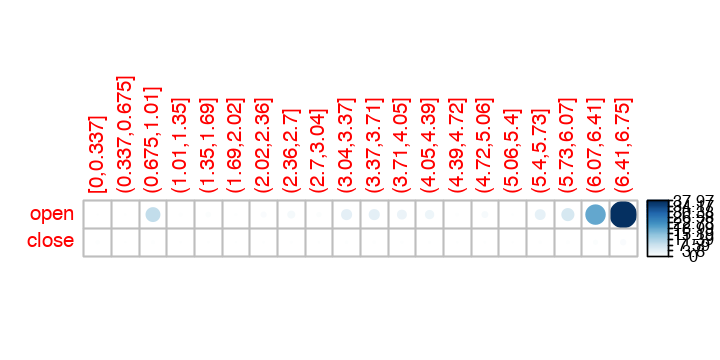

In [123]:
contrib <- 100*chisq$residuals^2/chisq$statistic
round(contrib, 3)
options(repr.plot.width=6, repr.plot.height=3)
require(corrplot)
corrplot(contrib, is.cor = FALSE)